In [1]:
from scipy.sparse import csr_matrix

In [18]:
!gdalinfo aso_vegabove2_test.tif

Driver: GTiff/GeoTIFF
Files: aso_vegabove2_test.tif
Size is 32768, 26547
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.893798828000001,38.229546134000003)
Pixel Size = (0.000021457671875,-0.000016956626474)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.8937988,  38.2295461) (119d53'37.68"W, 38d13'46.37"N)
Lower Left  (-119.8937988,  37.7793986) (119d53'37.68"W, 37d46'45.83"N)
Upper Right (-119.1906738,  38.2295461) (119d11'26.43"W, 38d13'46.37"N)
Lower Right (-119.1906738,  37.7793986) (119d11'26.43"W, 37d46'45.83"N)
Center      (-119.5422363,  38.0044724) (119d32'32.05"W, 38d 0'16.10"N)
Band 1 Block=32768x1 Type=Float32, ColorInterp=Gray
  Min=0.000 Max=1.0

In [19]:
!gdalinfo pred_vegabove2_test.tif

Driver: GTiff/GeoTIFF
Files: pred_vegabove2_test.tif
Size is 32768, 26547
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.893798828000001,38.229546134000003)
Pixel Size = (0.000021457671875,-0.000016956626474)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.8937988,  38.2295461) (119d53'37.68"W, 38d13'46.37"N)
Lower Left  (-119.8937988,  37.7793986) (119d53'37.68"W, 37d46'45.83"N)
Upper Right (-119.1906738,  38.2295461) (119d11'26.43"W, 38d13'46.37"N)
Lower Right (-119.1906738,  37.7793986) (119d11'26.43"W, 37d46'45.83"N)
Center      (-119.5422363,  38.0044724) (119d32'32.05"W, 38d 0'16.10"N)
Band 1 Block=32768x1 Type=Float32, ColorInterp=Gray
  Min=0.000 Max=1.

In [2]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
# aso_vegabove2_test.tif
#pred_vegabove2_test.tif
# Load the veg aso
veg_aso_2 = rio.open(r'aso_vegabove2_test.tif')
veg_aso_2_mask = veg_aso_2.read(1)



/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
veg_mask_2 = rio.open(r'pred_vegabove2_test.tif')
veg_pred_2_mask = veg_mask_2.read(1)

In [24]:
np.unique(veg_pred_2_mask)

array([-3.4e+38,  0.0e+00,  1.0e+00], dtype=float32)

In [25]:
true = veg_pred_2_mask[~(veg_pred_2_mask == -3.4e+38)]

In [26]:
np.unique(true)

array([-3.4e+38,  0.0e+00,  1.0e+00], dtype=float32)

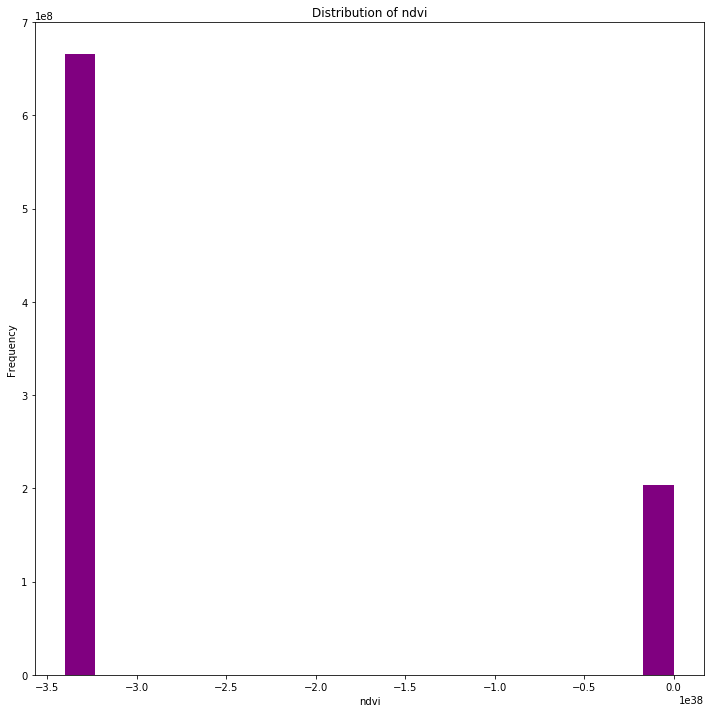

In [23]:
import earthpy.spatial as es
import earthpy.plot as ep
ep.hist(veg_pred_2_mask, colors=['purple'],
        title="Distribution of ndvi",
        xlabel='ndvi',
        ylabel='Frequency')
plt.show()

In [20]:
def compute_performance(true, pred, nodata = -9999):

    true = true.flatten()
    true = true[~(true == nodata)]

    pred = pred.flatten()
    pred = pred[~(pred == nodata)]

    assert(pred.shape == true.shape)

    performance = metrics.precision_recall_fscore_support(true, pred, average = 'binary')

    accuracy = metrics.balanced_accuracy_score(true, pred)

    kappa = metrics.cohen_kappa_score(true, pred)

    result = {
        "Precision": performance[0],
        "Recall" : performance[1],
        "F-Score": performance[2],
        "Balanced Accuracy": accuracy,
        "Kappa" : kappa
    }

    return result

In [22]:
from sklearn import metrics
ok = compute_performance(veg_aso_2_mask,veg_pred_2_mask,nodata=-3.39999999999999996e+38)

ValueError: continuous is not supported

In [10]:
veg_pred_2_mask_bo = veg_pred_2_mask>0

In [11]:
veg_aso_2_mask_bo = veg_aso_2_mask>0

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(veg_pred_2_mask_bo, veg_aso_2_mask_bo)

0.038196406373601534

In [16]:
mets = sklearn.metrics.f1_score(veg_pred_2_mask_bo, veg_aso_2_mask_bo, , average='weighted',labels=np.unique(y_pred))


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
mets

array([0.        , 0.        , 0.        , ..., 0.35587189, 0.35591358,
       0.36816327])

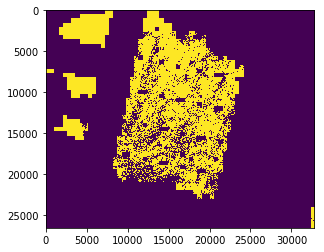

In [13]:
from rasterio.plot import show
show(veg_pred_2_mask)

In [4]:
import sklearn.metrics

In [16]:
S = csr_matrix(veg_aso_2_mask.flatten())

In [17]:
P = csr_matrix(veg_pred_2_mask.flatten())

MemoryError: 

In [15]:
mets = sklearn.metrics.f1_score

ValueError: Classification metrics can't handle a mix of continuous and binary targets